# K-Means Clustering (Simplified):

    Imagine you’re organizing a messy room with scattered toys. Your goal is to group similar toys together: all the cars in one group, all the dolls in another, and so on. You don’t know how many groups there are, but you can decide on a number (say 𝑘 = 3) and start grouping.



What is K-Means Clustering?
K-Means is an algorithm that groups data into 
𝑘
k clusters (groups) based on their similarity. It works by finding 
𝑘
k cluster centers (called centroids) and assigning each data point to the nearest centroid.



How K-Means Works (Step-by-Step):
Choose 
𝑘
k:

Decide the number of clusters (groups) you want to create.
Initialize Centroids:

Randomly pick 
𝑘
k points in the data as the starting centroids (cluster centers).
Assign Points to Clusters:

For each data point, find the nearest centroid and assign the point to that cluster.
Update Centroids:

Recalculate the centroids by taking the average position of all points in each cluster.
Repeat:

Repeat steps 3 and 4 until the centroids stop moving (converge) or a set number of iterations is reached.



Key Idea:
Data Points Close Together: Belong to the same cluster.
Centroid: Represents the center of a cluster.
The algorithm minimizes the distance between data points and their assigned centroid.




Real-World Example:
Imagine you have a basket of mixed fruits. You want to group them by size:

Decide 
𝑘
=
2
k=2 (small fruits and large fruits).
Start with random guesses for "small" and "large" sizes.
Assign each fruit to the nearest size (cluster).
Adjust the "small" and "large" sizes based on the average size of fruits in each group.
Repeat until the groups are stable.


Limitations:
You need to choose 
𝑘
k (number of clusters) in advance.
Doesn’t work well if clusters are not spherical or if data has noise.


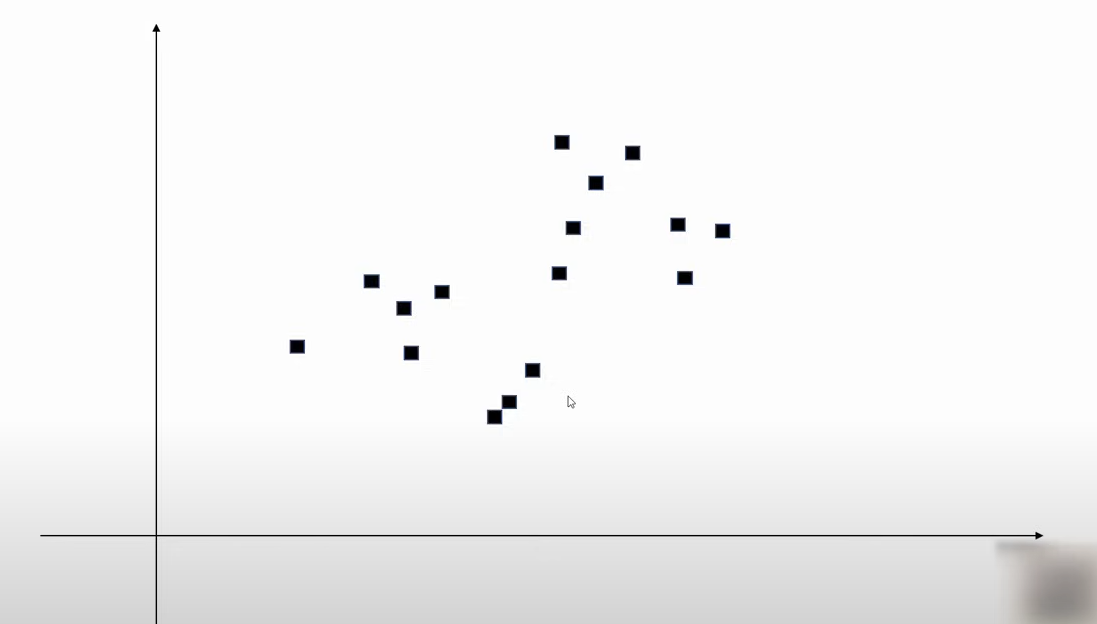
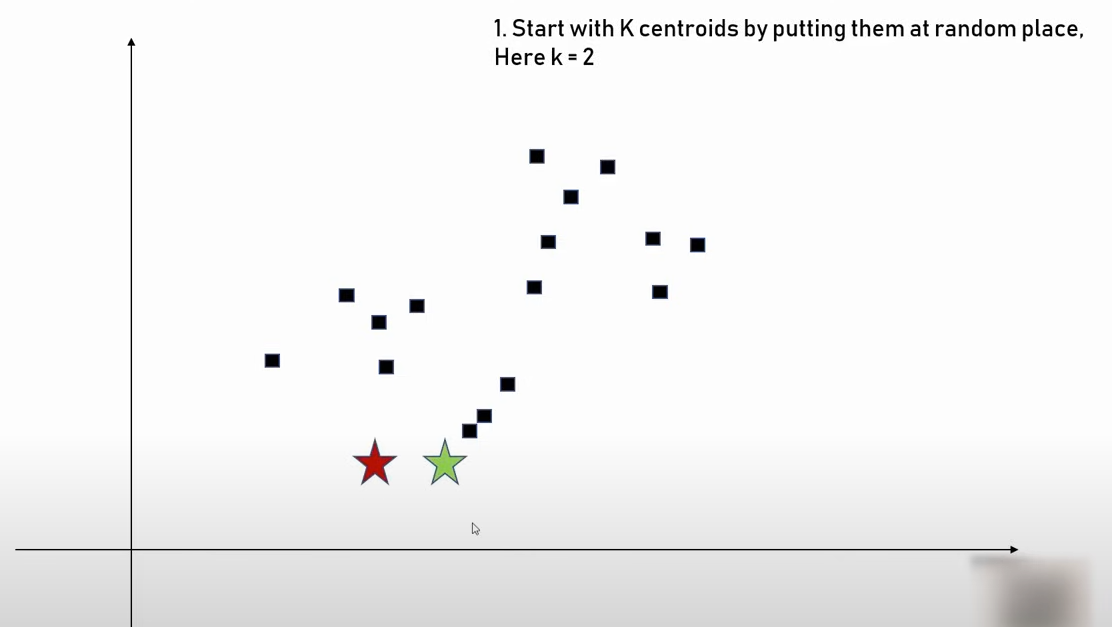
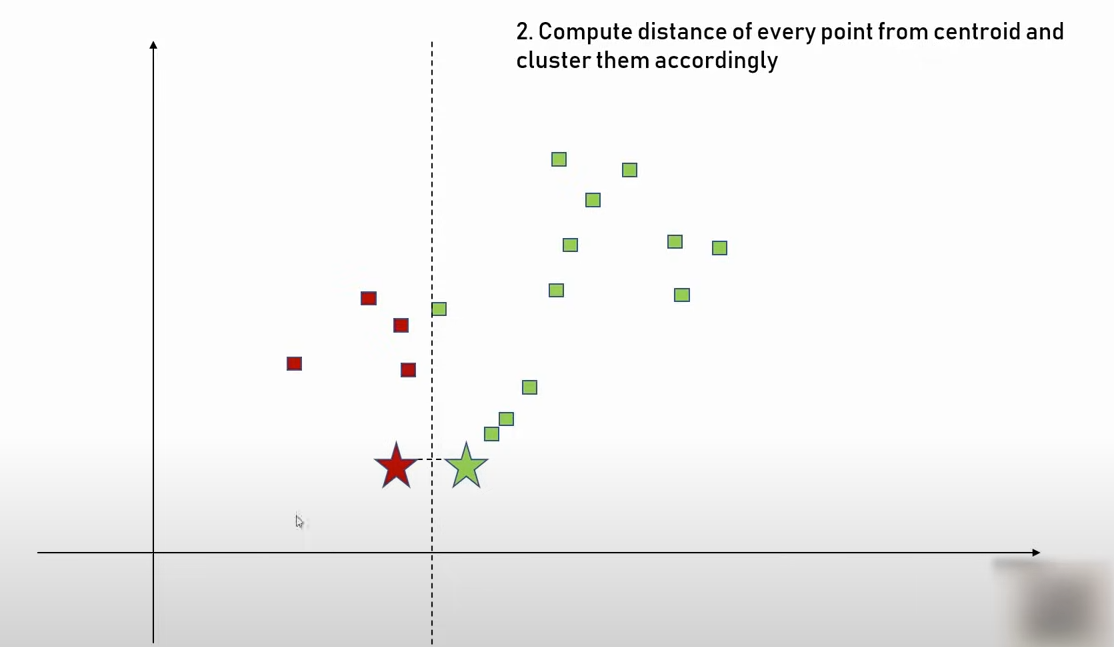
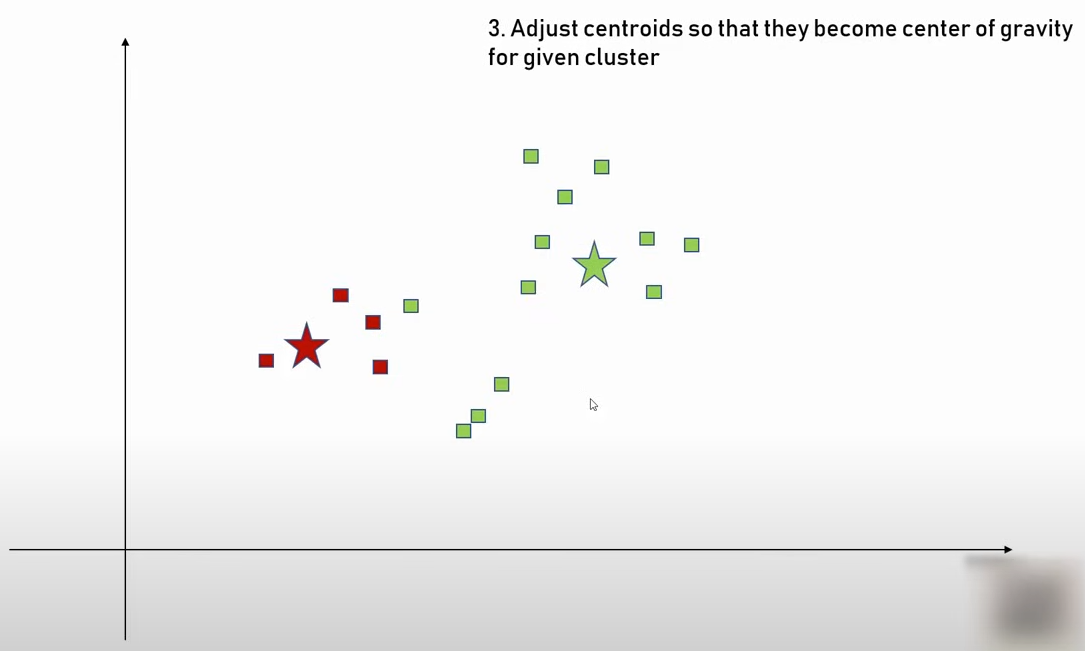
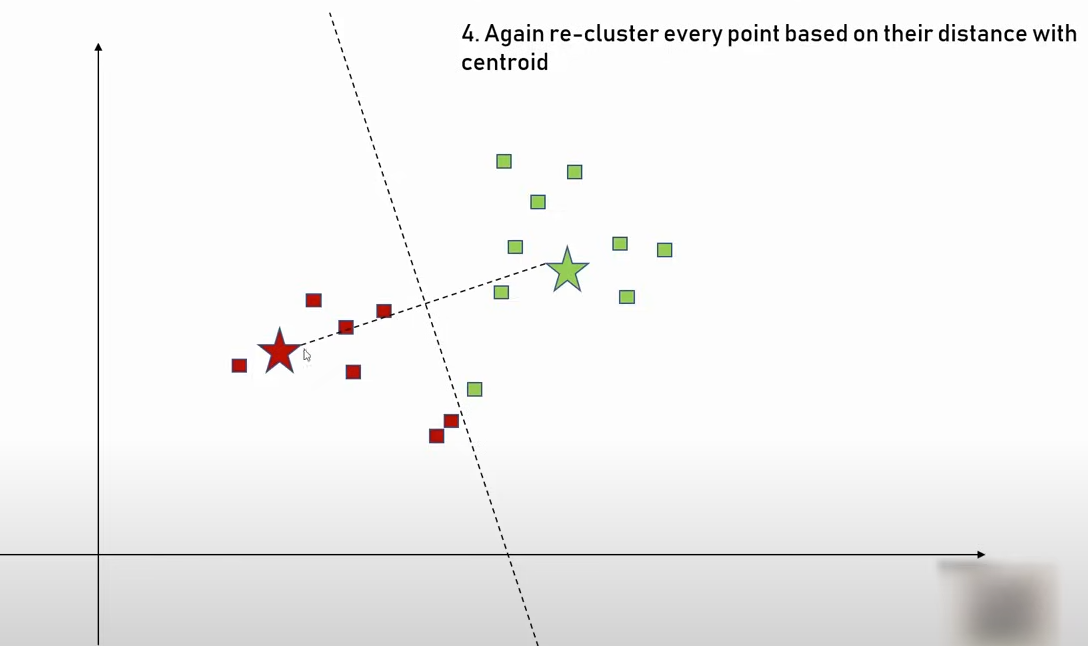
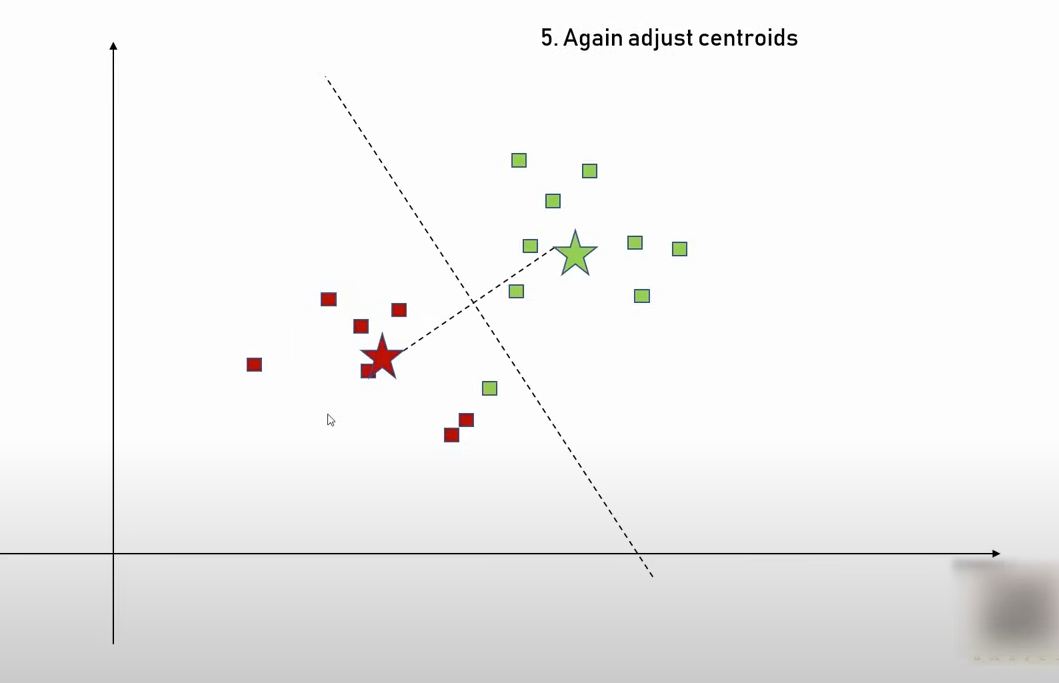
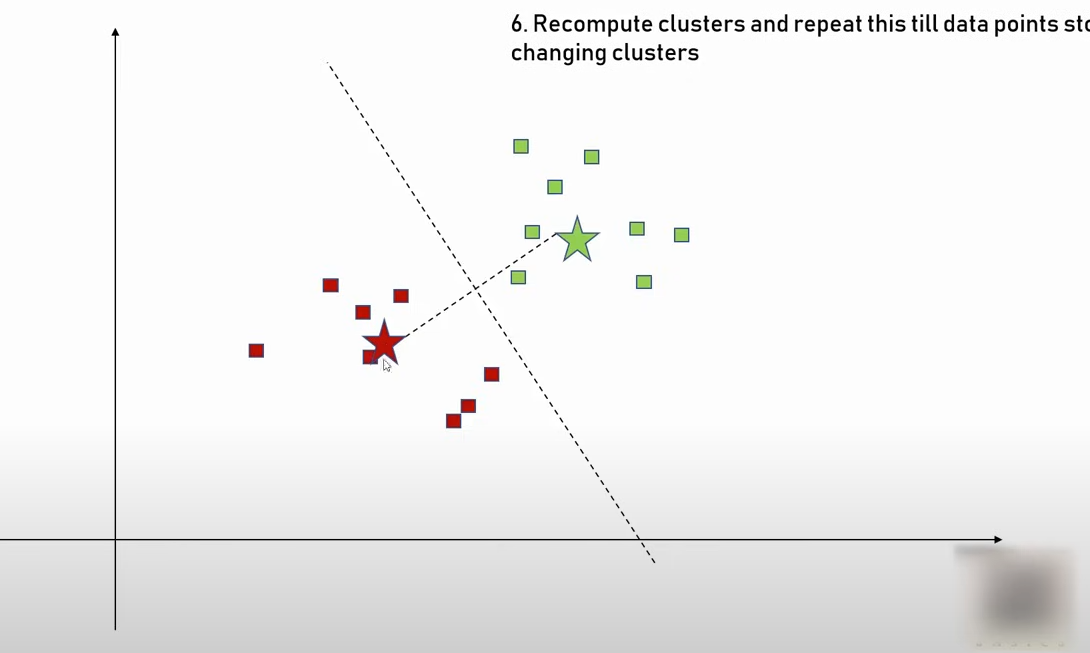


SSE (Sum of Squared Errors) in K-Means:
SSE is a metric used in K-Means clustering to measure how well the clusters fit the data. It tells us how "tight" the clusters are by calculating the sum of the squared distances between each data point and its cluster centroid.

How SSE Works:

For Each Data Point:

Find the distance between the data point and the centroid of the cluster it belongs to.
Square the Distance:

Squaring ensures all distances are positive and penalizes larger distances more.
Sum All Squared Distances:

Add up these squared distances for all data points in the dataset.

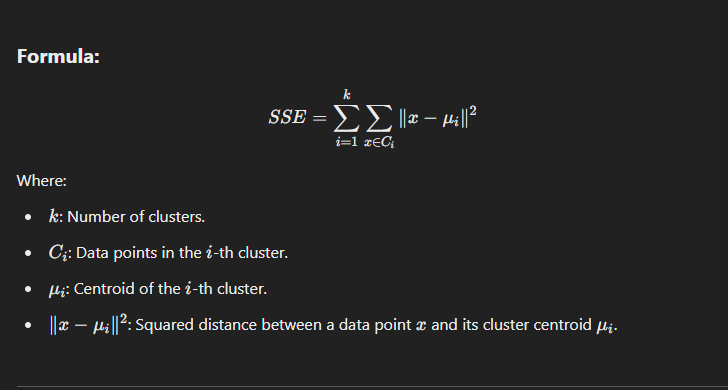


Why SSE is Important:
Evaluating Clustering Quality:
A lower SSE means the data points are closer to their centroids, indicating tighter and better clusters.
Choosing 
𝑘
k (Number of Clusters):
Elbow Method: Plot SSE vs. 
𝑘
k. Look for a point where the SSE decreases significantly and then flattens out (like an "elbow"). This is the optimal number of clusters.
Example:
Imagine clustering houses by their price:

If houses are far from their cluster center, the SSE will be high.
If houses are grouped tightly around their cluster center, the SSE will be low.

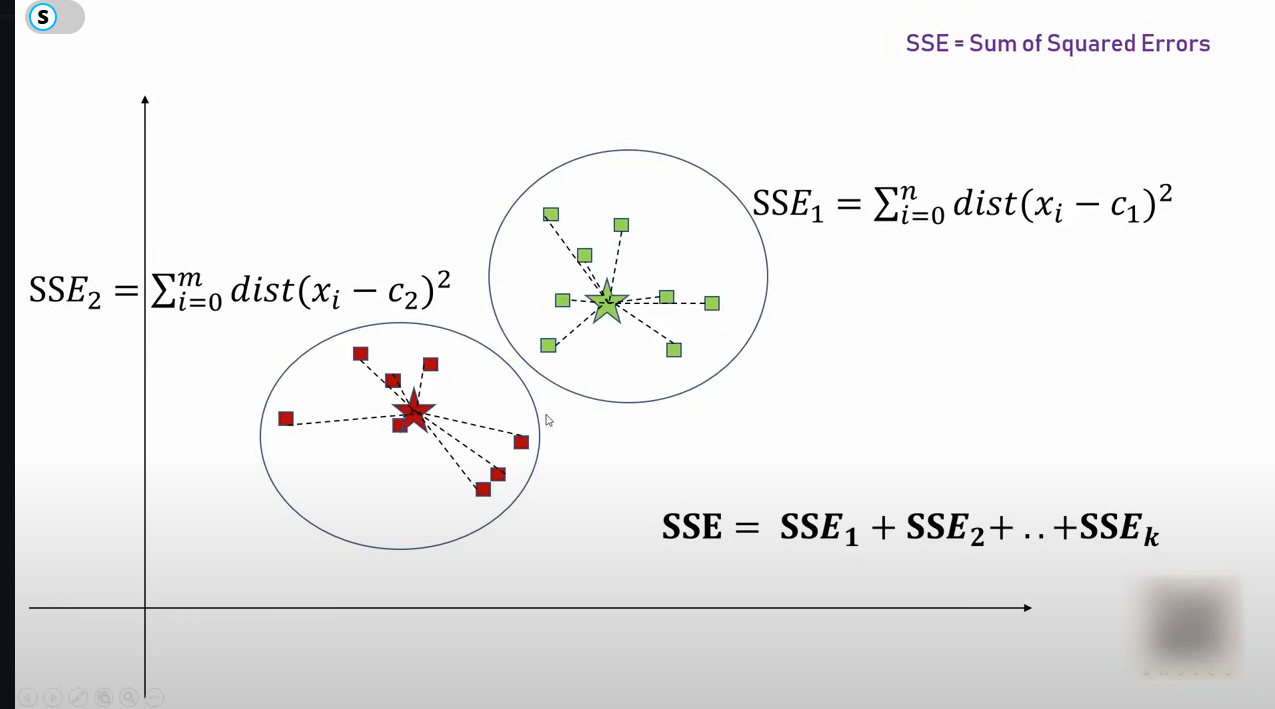
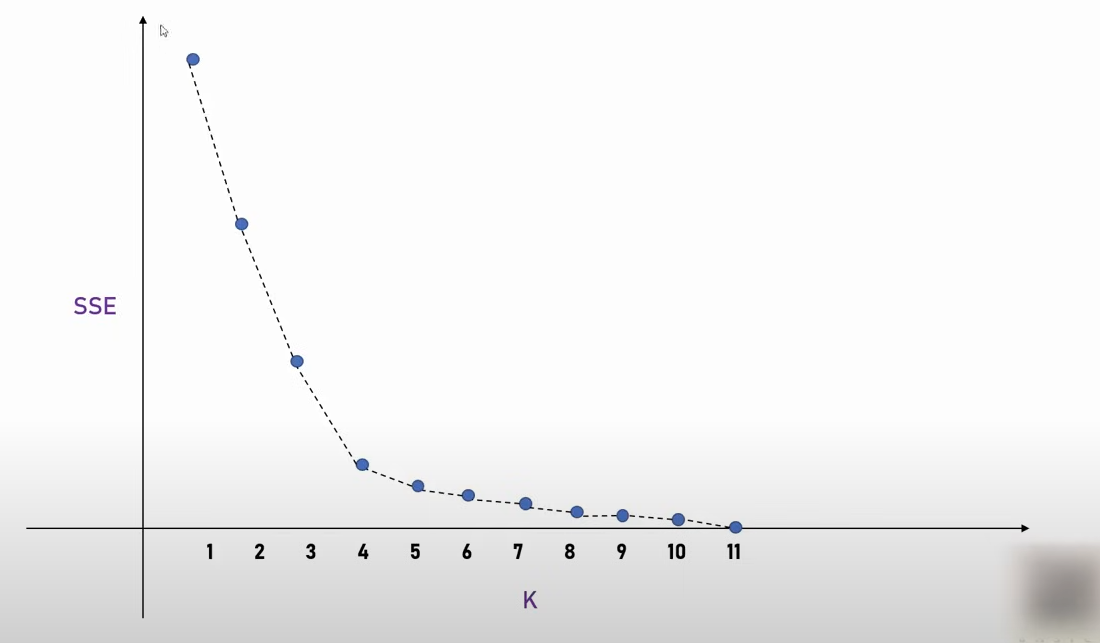
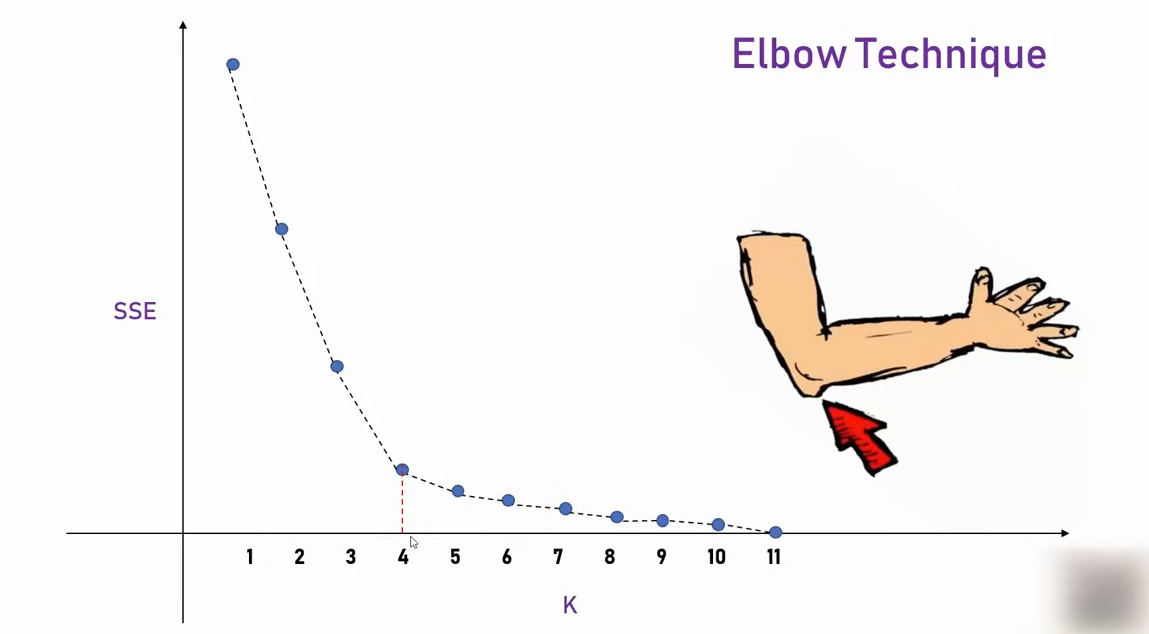

Here the elbow was on the cluster 4

In [1]:
import pandas as pd

df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


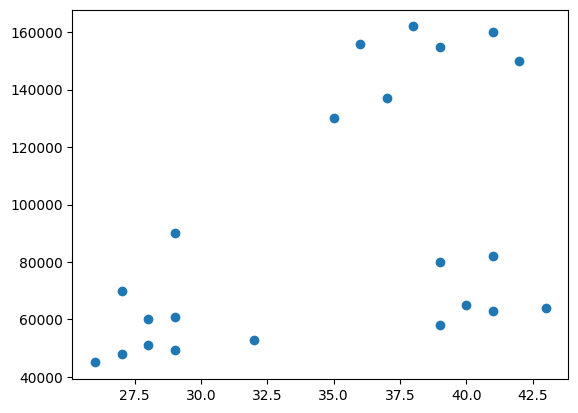

In [2]:
import matplotlib.pyplot as plt


plt.scatter(df['Age'], df['Income($)'])

Here its clear that there are 3 cluster (k=3)

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [4]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [5]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Text(0, 0.5, 'Income($)')

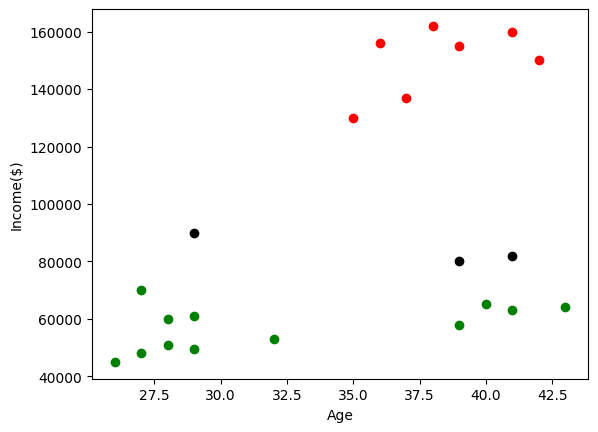

In [6]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Income($)')


Now here the red cluster is fine but there's something wrong with the black and green one

This is happening because our scalling is not right so we will use minmax scaller to fix this

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [8]:
df.head() # Now income is scaled between 0 and 1

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [9]:
scaler.fit(df[['Age']])                                                                 
df.Age = scaler.transform(df[['Age']])

In [10]:
df.head() # Now age is scaled between 0 and 1 but on the graph it will look same

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [11]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(df[['Age','Income($)']])

In [12]:
ypred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [13]:
df['cluster'] = ypred

In [14]:
df.head(20)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


Text(0, 0.5, 'Income($)')

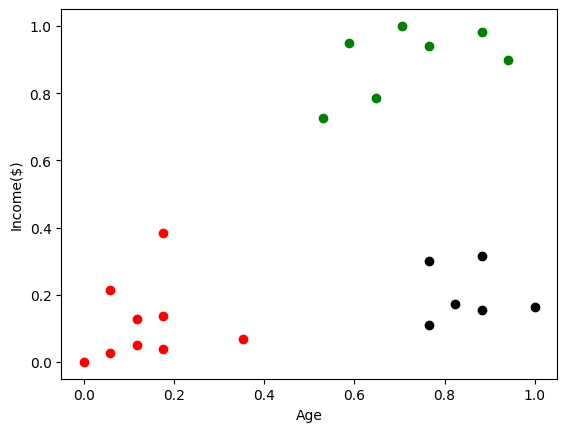

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Income($)')


In [16]:
km.cluster_centers_ # These are the centroids of the clusters

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

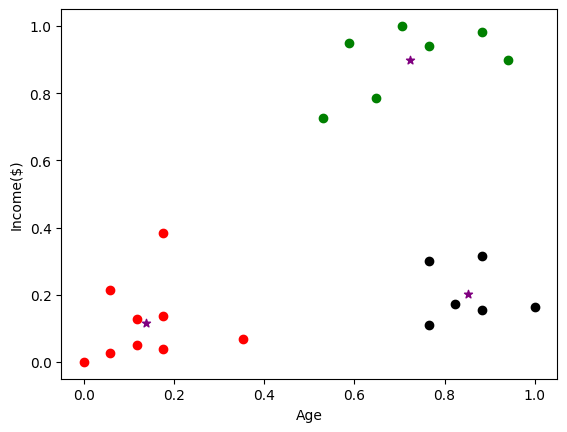

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')


In [19]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [20]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.4391474257674636,
 0.27687406216004695,
 0.2676656555331177,
 0.19556301488250746,
 0.16839437966297463,
 0.1038375258660356]

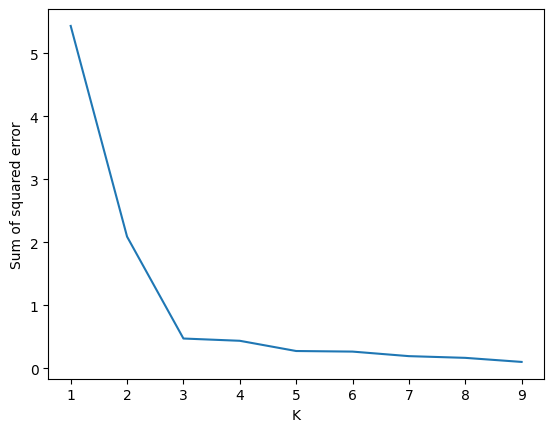

In [21]:
plt.xlabel('K')
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)